


 <b><font size="5" color='violet'>
Dataset Origin
</font></b>

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?select=heart.csv



 <b><font size="5" color='violet'>
Import Libraries
</font></b>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, ELU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files




 <b><font size="5" color='violet'>
Data Preprocessing
</font></b>

In [ ]:
uploaded = files.upload()
file_name = next(iter(uploaded))
#Read the CSV file into a DataFrame ,,
df = pd.read_csv(file_name)
#Confirmation message ,,
print("File uploaded and read successfully.")

Saving heart.csv to heart.csv
File uploaded and read successfully.


In [ ]:
print(df.shape)

(1025, 14)


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df['target'].value_counts()

,count
target,
1,526
0,499




 <b><font size="4" color='turquoise'>
Target Class Distribution:
</font></b>

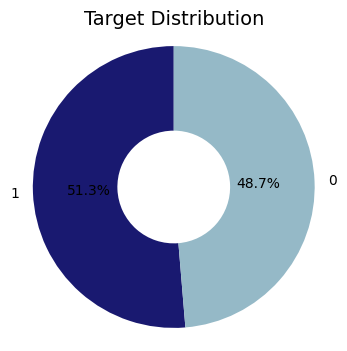

In [ ]:
target_counts = df['target'].value_counts()
#Extract the labels (target values) and counts ,,
targets = target_counts.index.astype(str)
counts = target_counts.values
#Plot the doughnut chart ,,
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=targets, autopct='%1.1f%%', colors=['#191970', '#95B9C7', '#FF9999'], startangle=90,
        wedgeprops={'width': 0.6})
plt.title('Target Distribution', fontsize=14)
plt.axis('equal')
center_circle = plt.Circle((0,0), 0.01, color='white')
plt.gca().add_artist(center_circle)
plt.show()



 <b><font size="4" color='turquoise'>
Normalize and standardize features:
</font></b>

In [ ]:
#Assuming df is your DataFrame containing the features ,,
X = df.drop('target', axis=1)
#Normalization (scaling values between 0 and 1) ,,
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X)
#Standardization (scaling values to have mean=0 and std=1) ,,
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
#Convert the numpy arrays back to DataFrames for easier inspection ,,
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)
#Displaying the first 5 rows of the normalized and standardized data ,,
print("Normalized Data (First 5 Rows):\n", X_normalized_df.head())
print("Standardized Data (First 5 Rows):\n", X_standardized_df.head())

Normalized Data (First 5 Rows):
         age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.479167  1.0  0.0  0.292453  0.196347  0.0      0.5  0.740458    0.0   
1  0.500000  1.0  0.0  0.433962  0.175799  1.0      0.0  0.641221    1.0   
2  0.854167  1.0  0.0  0.481132  0.109589  0.0      0.5  0.412214    1.0   
3  0.666667  1.0  0.0  0.509434  0.175799  0.0      0.5  0.687023    0.0   
4  0.687500  0.0  0.0  0.415094  0.383562  1.0      0.5  0.267176    0.0   

    oldpeak  slope    ca      thal  
0  0.161290    1.0  0.50  1.000000  
1  0.500000    0.0  0.00  1.000000  
2  0.419355    0.0  0.00  1.000000  
3  0.000000    1.0  0.25  1.000000  
4  0.306452    0.5  0.75  0.666667  
Standardized Data (First 5 Rows):
         age       sex        cp  trestbps      chol       fbs   restecg  \
0 -0.268437  0.661504 -0.915755 -0.377636 -0.659332 -0.418878  0.891255   
1 -0.158157  0.661504 -0.915755  0.479107 -0.833861  2.387330 -1.004049   
2  1.716595  0.661504 -0.915



 <b><font size="4" color='turquoise'>
Address any missing data:
</font></b>

In [ ]:
#Check for missing values in the dataset ,,
missing_values = df.isnull().sum()
#Display the missing values count for each column ,,
print("Missing values in each column:")
print(missing_values)
#If there are no missing values, print a message indicating so ,,
if missing_values.sum() == 0:
    print("No missing values found")

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
No missing values found




 <b><font size="4" color='turquoise'>
Encode categorical variables:
</font></b>

In [ ]:
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)
#Apply Label Encoding to binary categorical columns ,,
#No need for 'sex', 'fbs', 'exang' as they are already binary ,,
#Check the first few rows of the updated DataFrame ,,
print(df_encoded.head())

   age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  target   cp_1  \
0   52    1       125   212    0      168      0      1.0   2       0  False   
1   53    1       140   203    1      155      1      3.1   0       0  False   
2   70    1       145   174    0      125      1      2.6   0       0  False   
3   61    1       148   203    0      161      0      0.0   1       0  False   
4   62    0       138   294    1      106      0      1.9   3       0  False   

    cp_2   cp_3  restecg_1  restecg_2  slope_1  slope_2  thal_1  thal_2  \
0  False  False       True      False    False     True   False   False   
1  False  False      False      False    False    False   False   False   
2  False  False       True      False    False    False   False   False   
3  False  False       True      False    False     True   False   False   
4  False  False       True      False     True    False   False    True   

   thal_3  
0    True  
1    True  
2    True  
3    True  
4   Fals



 <b><font size="4" color='turquoise'>
Checking for Outliers:
</font></b>

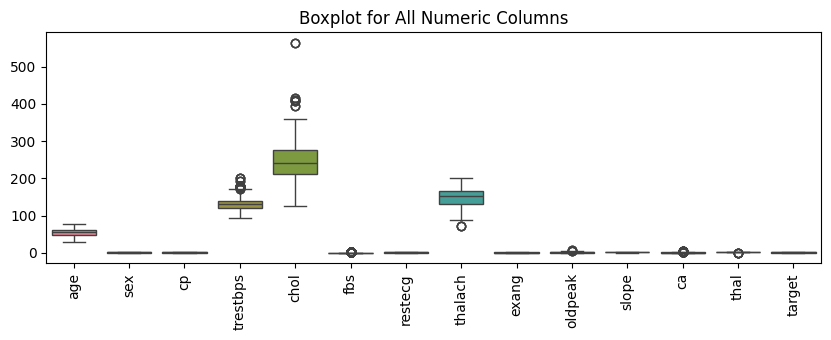

In [ ]:
#Plotting a boxplot for all numeric columns ,,
plt.figure(figsize=(10, 3))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title('Boxplot for All Numeric Columns')
plt.xticks(rotation=90)
plt.show()

There are some outliers in the columns, as shown in the boxplot. However, their impact is limited, as keeping or removing them does not significantly affect the model's accuracy or final results.

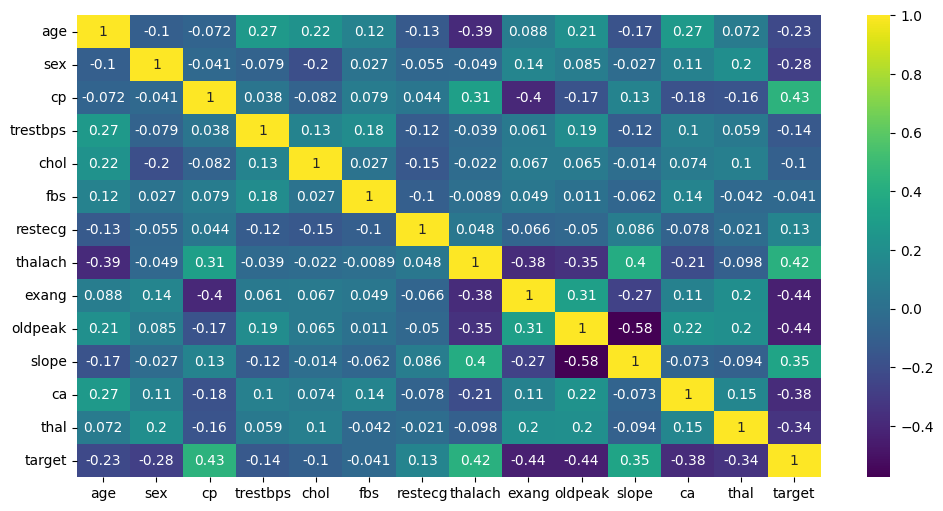

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.show()

In the heatmap, there are no values that show a strong correlation with the target column, nor are there any values that have an extremely weak correlation with the target. This reduced the effectiveness of the feature engineering process because, in this case, it is not likely to significantly impact the model's performance in a positive way.



 <b><font size="5" color='violet'>
Data splitting
</font></b>

In [ ]:
X = df.drop('target', axis=1)
y = df['target']
#Split the data into 80% training set and 20% testing set ,,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
#Display the shape of the training and testing data after the split ,,
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (820, 13) (820,)
Testing data shape: (205, 13) (205,)




 <b><font size="5" color='violet'>
Model Developing
</font></b>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.5116 - loss: 7.7551 - val_accuracy: 0.4829 - val_loss: 2.0959
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4946 - loss: 3.5612 - val_accuracy: 0.5024 - val_loss: 0.9589
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5158 - loss: 2.6545 - val_accuracy: 0.3951 - val_loss: 0.7338
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5295 - loss: 1.7988 - val_accuracy: 0.5268 - val_loss: 0.7113
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5090 - loss: 1.4122 - val_accuracy: 0.5171 - val_loss: 0.7447
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5249 - loss: 1.1984 - val_accuracy: 0.5171 - val_loss: 0.7173
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4994 - loss: 1.1345 - val_accuracy: 0.5171 - val_loss: 0.6965
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5366 - loss: 0.9483 - val_accuracy: 0.5171 - val_lo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,485 (142.52 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,324 (95.02 KB)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6624 - loss: 0.6125 
Test Loss: 0.6051369309425354
Test Accuracy: 0.6926829218864441


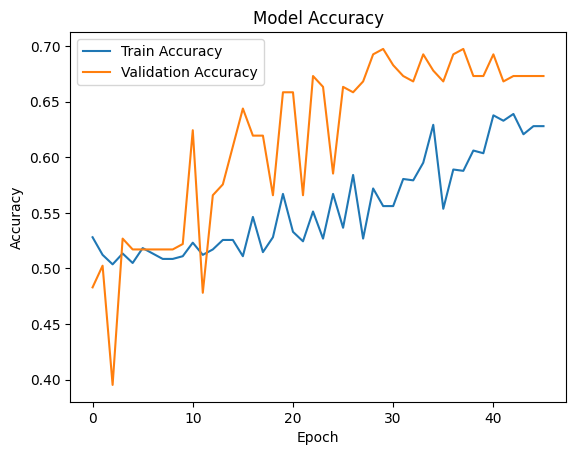

In [ ]:
#Design the DNN model ,,
def create_dnn_model(input_shape):
    model = Sequential()
    #First hidden layer ,,
    model.add(Dense(128, input_shape=(input_shape,), activation='relu'))
    model.add(Dropout(0.3))
    #Second hidden layer ,,
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    #Third hidden layer ,,
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    #Output layer ,,
    model.add(Dense(1, activation='sigmoid'))
    #Compile the model using Adam optimizer and binary crossentropy loss ,,
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model
#Early stopping callback configuration ,,
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
input_shape = X_train.shape[1]
model = create_dnn_model(input_shape)
#Train the model ,,
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50, batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)
#Display the model structure ,,
model.summary()
#Evaluate the model ,,
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
#Plot model accuracy only ,,
import matplotlib.pyplot as plt
#Plot model accuracy ,,
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()




 <b><font size="5" color='violet'>
Model Optimization and Improvement
</font></b>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.4407 - loss: 1.4413 - val_accuracy: 0.6098 - val_loss: 0.9861 - learning_rate: 3.0000e-04
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5892 - loss: 1.1469 - val_accuracy: 0.6146 - val_loss: 0.9562 - learning_rate: 3.0000e-04
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6299 - loss: 1.0553 - val_accuracy: 0.6244 - val_loss: 0.9990 - learning_rate: 3.0000e-04
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6632 - loss: 1.0095 - val_accuracy: 0.6244 - val_loss: 1.0024 - learning_rate: 3.0000e-04
Epoch 5/200
25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6580 - loss: 1.0340
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6567 - loss: 1.0332 - val_accuracy: 0.6195 - val_loss: 1.0237 - learning_rate: 3.0000e-04
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6309 - los

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu (ELU)                            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_1 (ELU)                          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_2 (ELU)                          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_3 (ELU)                          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_4 (ELU)                          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │              

 Total params: 146,053 (570.52 KB)

 Trainable params: 48,353 (188.88 KB)

 Non-trainable params: 992 (3.88 KB)

 Optimizer params: 96,708 (377.77 KB)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7343 - loss: 0.8502 
Test Loss: 0.8424469828605652
Test Accuracy: 0.7365853786468506


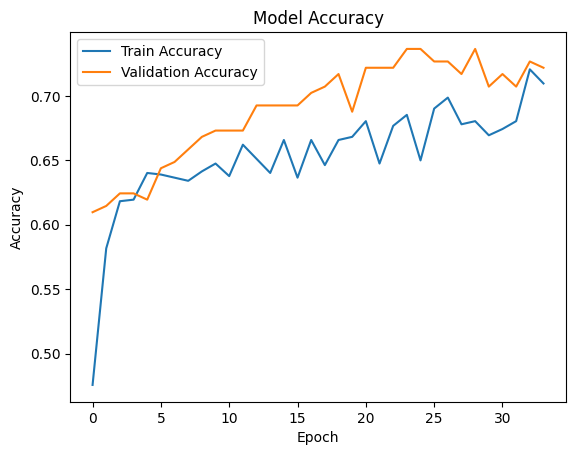

In [ ]:
np.random.seed(101)
tf.random.set_seed(101)
#Design the DNN model with additional layers and regularization ,,
def create_dnn_model(input_shape):
    model = Sequential()
    #First hidden layer with Batch Normalization, Dropout, and L2 Regularization ,,
    model.add(Dense(256, input_shape=(input_shape,), kernel_regularizer=l2(0.001)))
    model.add(ELU())
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    #Second hidden layer ,,
    model.add(Dense(128, kernel_regularizer=l2(0.001)))
    model.add(ELU())
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    #Third hidden layer ,,
    model.add(Dense(64, kernel_regularizer=l2(0.001)))
    model.add(ELU())
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    #Fourth hidden layer ,,
    model.add(Dense(32, kernel_regularizer=l2(0.001)))
    model.add(ELU())
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    #Fifth hidden layer ,,
    model.add(Dense(16, kernel_regularizer=l2(0.001)))
    model.add(ELU())
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    #Output layer ,,
    model.add(Dense(1, activation='sigmoid'))
    #Compile the model using Adam optimizer and binary crossentropy loss ,,
    model.compile(optimizer=Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])
    return model
#Early stopping and learning rate reduction with delayed early stopping based on accuracy improvement ,,
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=10,
                               verbose=1,
                               restore_best_weights=True,
                               min_delta=0.005)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=0.00001)
#Initialize the model ,,
input_shape = X_train.shape[1]
model = create_dnn_model(input_shape)
#Train the model ,,
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=200, batch_size=32,
                    callbacks=[early_stopping, lr_reduction],
                    verbose=1)
#Display the model structure ,,
model.summary()
#Evaluate the model ,,
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
#Plot model accuracy ,,
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

The model was improved by:

* Increasing the number of layers to enhance the model’s learning capacity.
* Using ELU instead of ReLU to improve gradient flow.
* Adding BatchNormalization to speed up training stabilization.
* Applying L2 Regularization to reduce overfitting.
* Implementing Dropout with rates between 30-40% to prevent overfitting.
* Enhancing early stopping by increasing patience and focusing on val_accuracy.
* Reducing the learning rate automatically when performance doesn't improve.



 <b><font size="5" color='violet'>
Model Evaluation
</font></b>

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.66      0.72       106
           1       0.69      0.82      0.75        99

    accuracy                           0.74       205
   macro avg       0.74      0.74      0.74       205
weighted avg       0.75      0.74      0.74       205



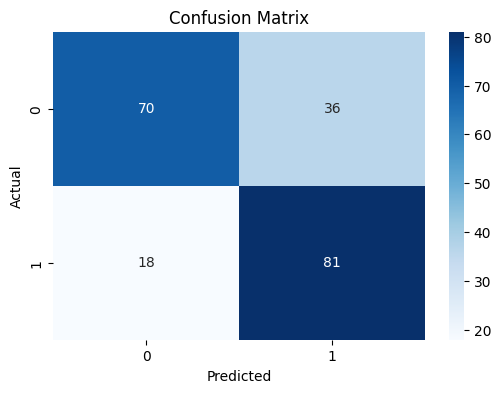

Number of misclassified samples: 54

Misclassified samples:

Sample index: 2
Actual label: 0, Predicted label: 1
Features: [ 38.    1.    3.  120.  231.    0.    1.  182.    1.    3.8   1.    0.
   3. ]

Sample index: 4
Actual label: 0, Predicted label: 1
Features: [ 54.   1.   1. 192. 283.   0.   0. 195.   0.   0.   2.   1.   3.]

Sample index: 5
Actual label: 0, Predicted label: 1
Features: [ 51.    1.    0.  140.  299.    0.    1.  173.    1.    1.6   2.    0.
   3. ]

Sample index: 9
Actual label: 0, Predicted label: 1
Features: [ 54.   1.   1. 192. 283.   0.   0. 195.   0.   0.   2.   1.   3.]

Sample index: 12
Actual label: 1, Predicted label: 0
Features: [ 42.    0.    0.  102.  265.    0.    0.  122.    0.    0.6   1.    0.
   2. ]


In [ ]:
#Step 1: Predict the test set results ,,
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
#Ensure y_test is a NumPy array and both y_pred and y_test are 1D arrays ,,
y_test = y_test.values if hasattr(y_test, 'values') else y_test
y_test = y_test.flatten()
y_pred = y_pred.flatten()
#Step 2: Print classification report ,,
print("Classification Report:\n", classification_report(y_test, y_pred))
#Step 3: Confusion matrix and heatmap ,,
conf_matrix = confusion_matrix(y_test, y_pred)
#Plot confusion matrix heatmap ,,
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
#Step 4: Identify and print misclassified samples ,,
#Find the indices where predictions don't match the actual values ,,
misclassified_indices = np.where(y_pred != y_test)[0]
print(f"Number of misclassified samples: {len(misclassified_indices)}")
if len(misclassified_indices) > 0:
    num_samples_to_show = min(5, len(misclassified_indices))
    print("\nMisclassified samples:")
    for idx in misclassified_indices[:num_samples_to_show]:
        print(f"\nSample index: {idx}")
        print(f"Actual label: {y_test[idx]}, Predicted label: {y_pred[idx]}")
        #Ensure X_test is converted to a DataFrame or NumPy array for proper indexing ,,
        if isinstance(X_test, pd.DataFrame):
            print(f"Features: {X_test.iloc[idx].values}")
        else:
            print(f"Features: {X_test[idx]}")
else:
    print("No misclassified samples found.")

The model's overall performance is good and demonstrates a clear ability to classify the data correctly. The improvements made have significantly increased the model's accuracy, and it now operates efficiently in distinguishing between the different categories.



---

